In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [75]:
df = pd.read_csv("https://raw.githubusercontent.com/aisaiahpellecer/data-science-projects/main/IS204_Research_Design/chsp-compendium-systems.csv")

In [76]:
rows = df.shape[0]
columns = df.shape[1]

print(f'there are {rows} rows and {columns} columns in the dataframe')

there are 637 rows and 38 columns in the dataframe


In [77]:
for col in df.columns:
    print(col)

health_sys_id
health_sys_name
health_sys_city
health_sys_state
in_onekey
in_aha
onekey_id
aha_sysid
total_mds
prim_care_mds
total_nps
total_pas
grp_cnt
hosp_cnt
acutehosp_cnt
nh_cnt
sys_multistate
sys_beds
sys_dsch
sys_res
maj_inv_owned
deg_children
sys_incl_majteachhosp
sys_incl_vmajteachhosp
sys_teachint
sys_incl_highdpphosp
sys_highucburden
sys_incl_highuchosp
sys_anyins_product
sys_mcare_adv
sys_mcaid_mngcare
sys_healthins_mktplc
sys_ma_plan_contracts
sys_ma_plan_enroll
sys_apm
sys_aco
sys_ebpm
sys_pctm


In [78]:
print("The sum of missing values in each column")
missing_values = df.isnull().sum()
print(missing_values)

# assert 0 =! missing_values, "Result: There are missing values in the data set"
# assert( (63 <= df_10.mean()).bool() & (df_10.mean() <= 65).bool() ), "The Catch 10 simulation is not correct!"


The sum of missing values in each column
health_sys_id               0
health_sys_name             0
health_sys_city             0
health_sys_state            0
in_onekey                   0
in_aha                      0
onekey_id                   4
aha_sysid                 324
total_mds                   0
prim_care_mds               3
total_nps                   4
total_pas                   4
grp_cnt                     3
hosp_cnt                    0
acutehosp_cnt               0
nh_cnt                      4
sys_multistate              0
sys_beds                    2
sys_dsch                    2
sys_res                     2
maj_inv_owned               2
deg_children                0
sys_incl_majteachhosp       2
sys_incl_vmajteachhosp      2
sys_teachint                2
sys_incl_highdpphosp        2
sys_highucburden            2
sys_incl_highuchosp         2
sys_anyins_product         40
sys_mcare_adv              67
sys_mcaid_mngcare          62
sys_healthins_mktplc       68

In [79]:
df_1 = df.loc[:,('sys_highucburden','sys_teachint','total_mds','prim_care_mds','total_nps','total_pas','grp_cnt', 'sys_aco','hosp_cnt', "sys_dsch",)]
df_1.dropna()

df_1

,sys_highucburden,sys_teachint,total_mds,prim_care_mds,total_nps,total_pas,grp_cnt,sys_aco,hosp_cnt,sys_dsch
0,1.0,1.0,221,89.0,94.0,12.0,51.0,144,3,10533.0
1,1.0,1.0,2558,940.0,668.0,269.0,570.0,1342,34,366041.0
2,0.0,1.0,1716,621.0,358.0,300.0,345.0,232,28,136567.0
3,0.0,0.0,283,85.0,46.0,63.0,46.0,0,4,33181.0
4,1.0,2.0,474,163.0,44.0,43.0,9.0,0,3,15310.0
...,...,...,...,...,...,...,...,...,...,...
632,0.0,1.0,77,22.0,14.0,5.0,3.0,150,1,10903.0
633,0.0,0.0,53,28.0,16.0,9.0,10.0,0,1,3012.0
634,0.0,1.0,258,89.0,67.0,38.0,55.0,176,1,7739.0
635,0.0,0.0,71,28.0,19.0,10.0,20.0,58,2,3914.0


In [80]:
df_1['grp_cnt'].dtypes

dtype('float64')

In [81]:
# Calculating System Quality
# Note: Hospital = (Numeric) Total number of hospitals per system
# Note: Hospital = (Numeric) Total number of medical groups (i.e., clinics) per system
# Note: sys_dsch =  (Numeric) Number of discharges per system

df_1["quality"] =df_1["sys_dsch"]/df_1["hosp_cnt"]+df_1['grp_cnt']



In [82]:


# plt.xlabel("Quality of Care (System Discharges/ Total hospitals)")
# plt.ylabel("Frequency")
# plt.title("Distribution of Quality of Care")
# system_quality.hist(bins=20)


10282.622497062626
8403.75


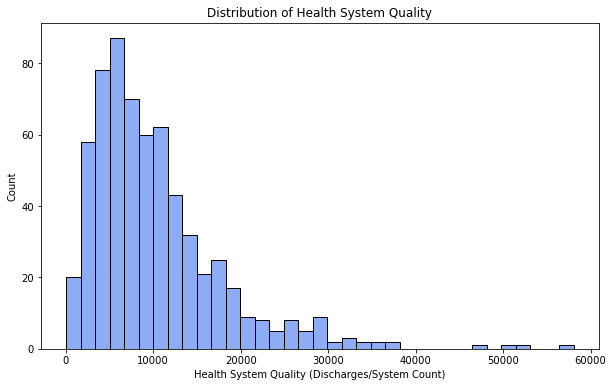

In [83]:
#System Quality Histogram
plt.figure(figsize=(10,6))
ax = sns.histplot(x="quality",data=df_1,bins=35, color= '#6890F0')
ax.set_xlabel("Health System Quality (Discharges/System Count)")
ax.set_title("Distribution of Health System Quality")
print(df_1["quality"].mean())
print(df_1["quality"].median())


Text(0.5, 0, 'High Uncompensated Care Burden')

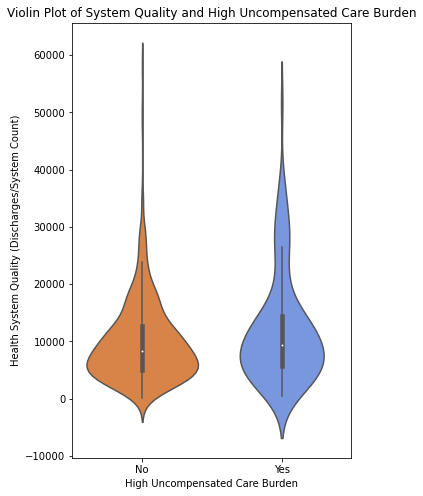

In [84]:

# Relationship between Uncompensated Care Burden (0/1) and quality of care 
#Uncompensated Care Burden (0/1) = df["sys_highucburden"]
plt.figure(figsize=(5,8))
colors_list = ['#F08030', '#6890F0']
ax = sns.violinplot(x="sys_highucburden", y="quality", data=df_1, palette=colors_list)
ax.set_xticklabels(['No','Yes'])
ax.set_title("Violin Plot of System Quality and High Uncompensated Care Burden")
ax.set_ylabel("Health System Quality (Discharges/System Count)")
ax.set_xlabel("High Uncompensated Care Burden")


In [85]:
print(df_1[df_1["sys_highucburden"]==1]["quality"].mean())
print(df_1[df_1["sys_highucburden"]==0]["quality"].mean())


print(df_1["quality"].median())


11904.934998038867
9898.474135774708
8403.75


Text(0.5, 0, 'Health System Quality (Discharges/System Count)')

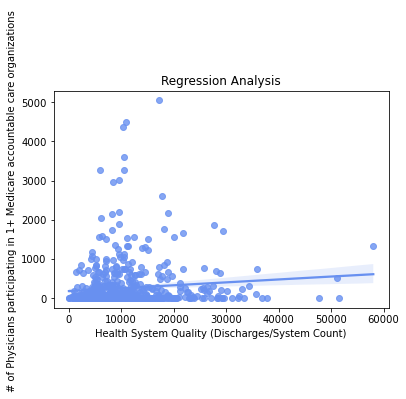

In [86]:
# Relationship between Insurance grouping and quality of care 
# Number of system-affiliated physicians who are participating in one or more Medicare accountable care organizations 
# sys_aco
ax = sns.regplot(y="sys_aco", x="quality", data=df_1, color="#6890F0");
ax.set_title("Regression Analysis")
ax.set_ylabel("# of Physicians participating in 1+ Medicare accountable care organizations ")
ax.set_xlabel("Health System Quality (Discharges/System Count)")


<AxesSubplot:>

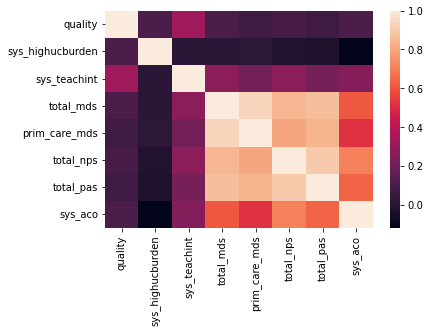

In [88]:
sns.heatmap(df_1[["quality",'sys_highucburden','sys_teachint','total_mds','prim_care_mds','total_nps','total_pas', 'sys_aco']].corr())

In [89]:
df_1[["quality",'sys_highucburden','sys_teachint','total_mds','prim_care_mds','total_nps','total_pas', 'sys_aco']].corr()

,quality,sys_highucburden,sys_teachint,total_mds,prim_care_mds,total_nps,total_pas,sys_aco
quality,1.000000,0.102796,0.317607,0.105839,0.067521,0.094039,0.064501,0.101589
sys_highucburden,0.102796,1.000000,0.007445,0.007919,0.013796,-0.022687,-0.033314,-0.120198
sys_teachint,0.317607,0.007445,1.000000,0.277061,0.208298,0.269326,0.219475,0.252937
total_mds,0.105839,0.007919,0.277061,1.000000,0.935934,0.845156,0.867026,0.609644
prim_care_mds,0.067521,0.013796,0.208298,0.935934,1.000000,0.802311,0.842418,0.517238
total_nps,0.094039,-0.022687,0.269326,0.845156,0.802311,1.000000,0.901132,0.705749
total_pas,0.064501,-0.033314,0.219475,0.867026,0.842418,0.901132,1.000000,0.635186
sys_aco,0.101589,-0.120198,0.252937,0.609644,0.517238,0.705749,0.635186,1.000000
